In [5]:
from influxdb import InfluxDBClient
from influxdb import DataFrameClient
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets


In [3]:
client = InfluxDBClient('192.168.100.155',8086,'schmuddel','schmuddel','schmuddel')
query = 'SELECT mean("pressure") AS "mean_pressure", mean("flow") AS "mean_flow"  FROM "schmuddel"."autogen"."schmuddel" WHERE time > now()-2h GROUP BY time(5s) fill(none)'

<AxesSubplot:xlabel='mean_pressure', ylabel='mean_flow'>

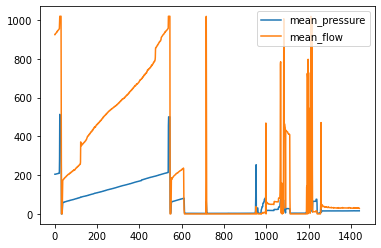

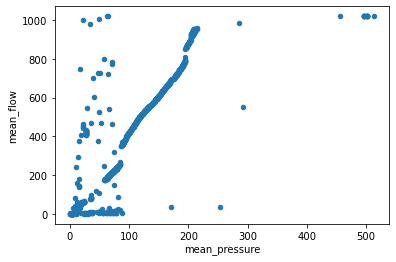

In [4]:
    res_points = list(client.query(query).get_points())
    df = pd.DataFrame(res_points)
    df.plot()
    df.plot(x="mean_pressure", y="mean_flow",kind='scatter')

In [6]:
dff =df.filter(items=[ 'time','mean_pressure', 'mean_flow'])
dff.fillna(0)

,time,mean_pressure,mean_flow
0,2021-10-05T12:06:45Z,115.687500,500.250000
1,2021-10-05T12:06:50Z,115.560000,500.340000
2,2021-10-05T12:06:55Z,116.591837,503.204082
3,2021-10-05T12:07:00Z,116.755102,503.346939
4,2021-10-05T12:07:05Z,116.780000,503.500000
...,...,...,...
2156,2021-10-05T15:06:25Z,145.820000,615.800000
2157,2021-10-05T15:06:30Z,146.673469,619.244898
2158,2021-10-05T15:06:35Z,146.755102,619.632653
2159,2021-10-05T15:06:40Z,146.860000,619.240000


In [74]:
dff.dtypes

likes             object
mean_flow        float64
mean_pressure    float64
dtype: object

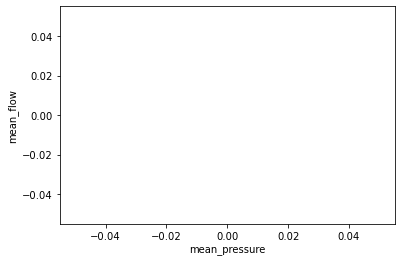

In [73]:
ax = dff.plot.scatter(x="mean_pressure", y="mean_flow",c="likes", colormap='viridis')

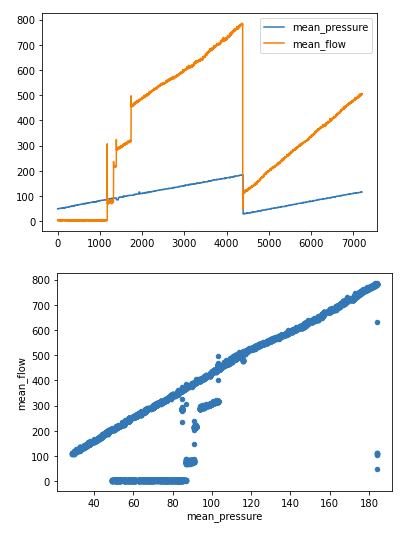
some randomness: flow is sometime rising linear with pressure